1. Load Cleaned Data

In [1]:
import pandas as pd

In [3]:
# Load the cleaned CSV
df = pd.read_csv("D:\Superstore_dataanalysis\Data/Superstore_Cleaned.csv")

In [4]:
# Preview first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery_Days,Profit_Margin,Order_Year,Order_Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,0.1600,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,0.3000,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,0.4700,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,-0.4000,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,0.1125,2015,10


2. Sales Analysis

In [5]:
#Sales by Region
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(sales_region)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


West region has the highest total sales


In [7]:
#Sales by Category
sales_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(sales_category)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


Technology category generates the highest sales.

3. Profit Analysis

In [8]:
#Profit by Category
profit_category = df.groupby('Category')['Profit'].sum().sort_values()
print(profit_category)

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


Furniture category shows the largest losses, while Technology is the most profitable.

In [9]:
#Loss Analysis (Negative Profit)
loss_df = df[df['Profit'] < 0]
loss_by_subcategory = loss_df.groupby('Sub-Category')['Profit'].sum().sort_values()
print(loss_by_subcategory)

Sub-Category
Binders       -38510.4964
Tables        -32412.1483
Machines      -30118.6682
Bookcases     -12152.2060
Chairs         -9880.8413
Appliances     -8629.6412
Phones         -7530.6235
Furnishings    -6490.9134
Storage        -6426.3038
Supplies       -3015.6219
Accessories     -930.6265
Fasteners        -33.1952
Name: Profit, dtype: float64


Binders, Tables, and Machines are the sub-categories generating the highest losses, contributing most to negative profit.

In [10]:
#Discount vs Profit
discount_profit = df.groupby('Discount')['Profit'].mean().sort_values()
print(discount_profit)

Discount
0.50   -310.703456
0.45   -226.646464
0.40   -111.927429
0.80   -101.796797
0.70    -95.874060
0.32    -88.560656
0.30    -45.679636
0.60    -43.077212
0.20     24.702572
0.15     27.288298
0.00     66.900292
0.10     96.055074
Name: Profit, dtype: float64


Higher discounts generally reduce profit margin.

4. Optional Visualizations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

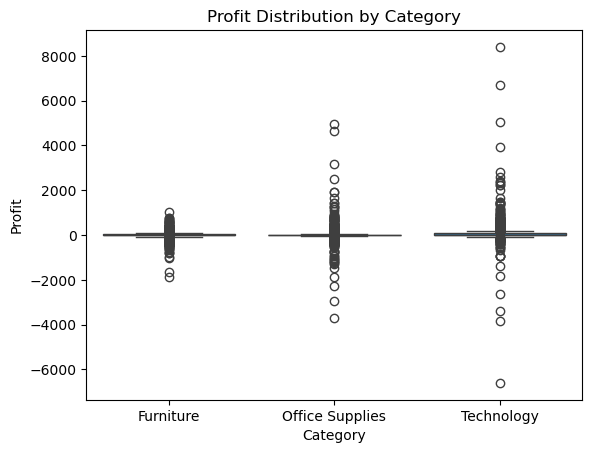

In [12]:
# Profit distribution by category
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit Distribution by Category")
plt.show()

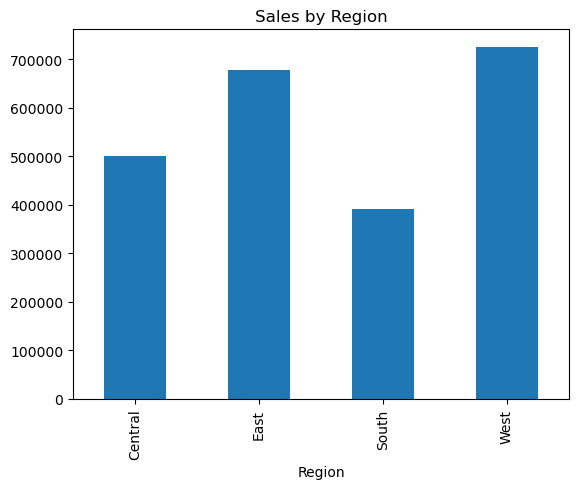

In [14]:
# Sales by Region bar plot
df.groupby('Region')['Sales'].sum().plot(kind='bar', title='Sales by Region')
plt.show()